In [167]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import datetime
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import seaborn as sns

speedrunurl = 'https://www.speedrun.com/api/v1'

In [168]:
sm64 = pd.read_csv('./csv/sm64df.csv')

sm64.head()


,place,player,speed_run_time,console,date_achieved
0,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z
1,2,zxzk1q9x,5730,w89rwelk,2025-03-18T23:22:54Z
2,3,j2ylqn68,5752,w89rwelk,2025-06-14T16:07:07Z
3,4,kjprmwk8,5762,w89rwelk,2024-07-07T17:33:13Z
4,5,1xyd46wx,5793,w89rwelk,2025-05-01T21:52:00Z


### convert console column to actual meaningful name

In [169]:
console_url = 'https://www.speedrun.com/api/v1/platforms/'
unique_console_ids = sm64['console'].unique()
console_dic = {}

print(unique_console_ids)

for id in unique_console_ids:
    new_url = console_url + id

    consoles = requests.get(new_url)
    consoles = consoles.json()['data']
    console_dic[id] = consoles['name']

print(console_dic)





['w89rwelk' 'nzelreqp' '7m6ylw9p' 'v06dr394']
{'w89rwelk': 'Nintendo 64', 'nzelreqp': 'Wii Virtual Console', '7m6ylw9p': 'Switch', 'v06dr394': 'Wii U Virtual Console'}


In [170]:
sm64['console'] = sm64['console'].replace(to_replace=console_dic)

sm64.head()

,place,player,speed_run_time,console,date_achieved
0,1,jn32931x,5728,Nintendo 64,2024-11-04T05:39:48Z
1,2,zxzk1q9x,5730,Nintendo 64,2025-03-18T23:22:54Z
2,3,j2ylqn68,5752,Nintendo 64,2025-06-14T16:07:07Z
3,4,kjprmwk8,5762,Nintendo 64,2024-07-07T17:33:13Z
4,5,1xyd46wx,5793,Nintendo 64,2025-05-01T21:52:00Z


## Percentage of the top speed runs in Super Mario 64 (120 Star Completion) by Console

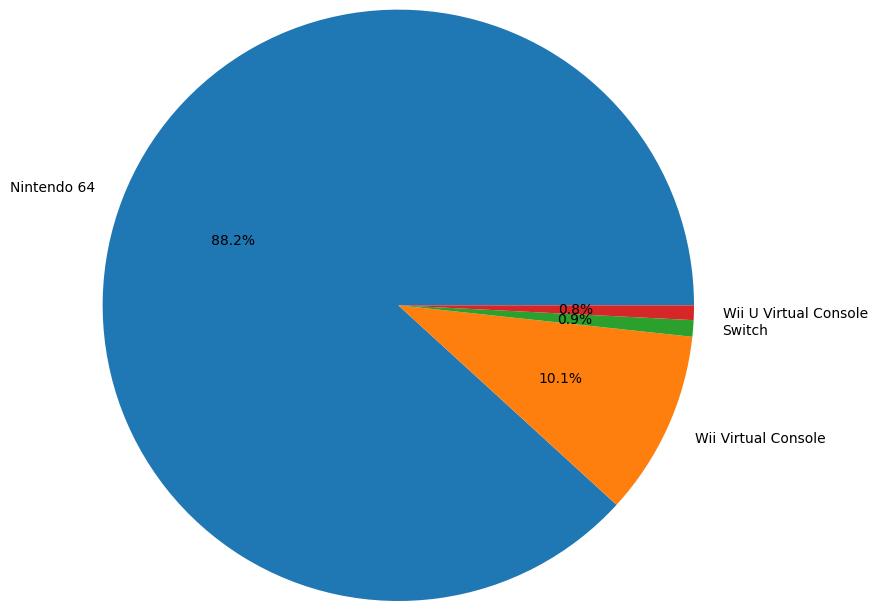

In [171]:
sm64df_top1000 = sm64[:1001]
console_names = list(console_dic.values())

results = []

for name in console_names:
    records = len(sm64df_top1000[sm64df_top1000['console'] == name])
    results.append(records)
fig, ax = plt.subplots()
ax.pie(results, labels=console_names, autopct='%1.1f%%', radius=2)
plt.show()

## How much does the console affect the speed at which you complete Super Mario 64?

In [174]:

one_hot_encoding = pd.get_dummies(sm64df_top1000['console'], prefix='console', drop_first=True)
# sm64df_top1000 = sm64df_top1000.drop(columns='console', axis=1)
df_encoded = sm64df_top1000.join(one_hot_encoding)

console_columns = [col for col in df_encoded.columns if col.startswith('console_')]

Y = df_encoded['speed_run_time']
X = df_encoded[console_columns].astype(int)



X_w_constant = sm.add_constant(X)


model = sm.OLS(Y,X_w_constant).fit()
model_params = model.params
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         speed_run_time   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     7.426
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           6.39e-05
Time:                        20:55:05   Log-Likelihood:                -8314.1
No. Observations:                1001   AIC:                         1.664e+04
Df Residuals:                     997   BIC:                         1.666e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Spread of 120 Star Super Mario 64 Speed Run Times according to Console Used 

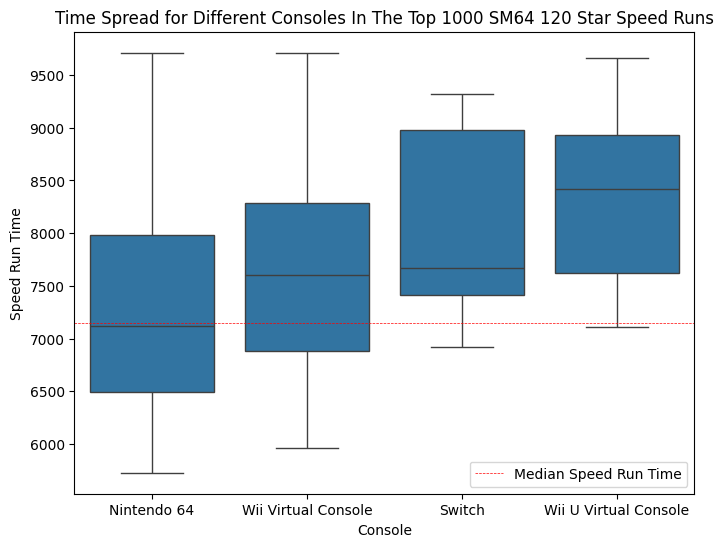

In [186]:
# plt.scatter(df_encoded['console'], df_encoded['speed_run_time'])

median_time = sm64df_top1000['speed_run_time'].median()

plt.figure(figsize=(8,6))

sns.boxplot(x='console', y='speed_run_time', data=df_encoded)
plt.axhline(y=median_time, color='red', linestyle='--', linewidth=0.5, label='Median Speed Run Time')
plt.title('Time Spread for Different Consoles In The Top 1000 SM64 120 Star Speed Runs')
plt.ylabel('Speed Run Time')
plt.xlabel('Console')
plt.legend()
plt.show()